# LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# DATA LOADING

In [2]:
Housing = pd.read_csv("Unclean_House_Price_Dataset.csv")
Housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1.0,NaN,5,NaN,3,1970,Downtown,excellent,no,149919
1,2.0,4272,5,4,3,1958,downtown,Excellent,No,424998
2,3.0,3592,2,2,3,1938,downtown,Good,No,266746
3,4.0,966,4,2,2,1902,Suburban,fair,Yes,NaN
4,5.0,4926,1,4,2,1975,downtown,Fair,Yes,636056


# DATA CLEANING

In [3]:
Housing.isnull().sum()

Id           100
Area         204
Bedrooms     198
Bathrooms    199
Floors       191
YearBuilt    197
Location       0
Condition      0
Garage         0
Price        200
dtype: int64

In [4]:
Housing.duplicated().sum()

0

In [5]:
Housing.dtypes

Id           float64
Area          object
Bedrooms      object
Bathrooms     object
Floors        object
YearBuilt     object
Location      object
Condition     object
Garage        object
Price         object
dtype: object

In [6]:
print(Housing.applymap(lambda x: x if isinstance(x, str) and not x.replace('.', '', 1).isdigit() else np.nan).dropna(how="all"))

      Id Area Bedrooms Bathrooms Floors    YearBuilt  Location  Condition  \
0    NaN  NaN      NaN       NaN    NaN          NaN  Downtown  excellent   
1    NaN  NaN      NaN       NaN    NaN          NaN  downtown  Excellent   
2    NaN  NaN      NaN       NaN    NaN          NaN  downtown       Good   
3    NaN  NaN      NaN       NaN    NaN          NaN  Suburban       fair   
4    NaN  NaN      NaN       NaN    NaN          NaN  downtown       Fair   
...   ..  ...      ...       ...    ...          ...       ...        ...   
2095 NaN  NaN      NaN       NaN    NaN  error_value     Rural       Good   
2096 NaN  NaN      NaN       NaN    NaN          NaN  suburban       good   
2097 NaN  NaN      NaN       NaN    NaN          NaN  suburban  excellent   
2098 NaN  NaN      NaN       NaN    NaN          NaN  Downtown       Good   
2099 NaN  NaN      NaN       NaN    NaN          NaN     Rural       Poor   

     Garage        Price  
0        no          NaN  
1        No          

In [7]:
numeric_cols = ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']

# Replace 'error_value' with NaN in numeric columns
Housing[numeric_cols] = Housing[numeric_cols].replace('error_value', np.nan)

# Convert numeric columns back to numbers
Housing[numeric_cols] = Housing[numeric_cols].apply(pd.to_numeric)
Housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1.0,NaN,5.0,NaN,3.0,1970.0,Downtown,excellent,no,149919.0
1,2.0,4272.0,5.0,4.0,3.0,1958.0,downtown,Excellent,No,424998.0
2,3.0,3592.0,2.0,2.0,3.0,1938.0,downtown,Good,No,266746.0
3,4.0,966.0,4.0,2.0,2.0,1902.0,Suburban,fair,Yes,NaN
4,5.0,4926.0,1.0,4.0,2.0,1975.0,downtown,Fair,Yes,636056.0


In [8]:
Housing[numeric_cols] = Housing[numeric_cols].fillna(Housing[numeric_cols].median())
Housing[numeric_cols] = Housing[numeric_cols].astype(int)
Housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,2779,5,3,3,1970,Downtown,excellent,no,149919
1,2,4272,5,4,3,1958,downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,fair,Yes,543085
4,5,4926,1,4,2,1975,downtown,Fair,Yes,636056


In [9]:
# Standardize casing for categorical columns
Housing['Location'] = Housing['Location'].str.lower().str.strip()
Housing['Condition'] = Housing['Condition'].str.lower().str.strip()
Housing['Garage'] = Housing['Garage'].str.lower().str.strip()

# Convert 'Garage' to binary values
Housing['Garage'] = Housing['Garage'].map({'yes': 1, 'no': 0})

In [10]:
print(Housing["Price"].dtype)  # Should be 'int64' or 'float64'
print(Housing["Price"].unique())  # Show unique values

int64
[149919 424998 266746 ... 416099 459633 689604]


In [11]:
Housing["Price"] = pd.to_numeric(Housing["Price"], errors="coerce")
Housing["Price"].fillna(Housing["Price"].median(), inplace=True)
Housing.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,2779,5,3,3,1970,downtown,excellent,0,149919
1,2,4272,5,4,3,1958,downtown,excellent,0,424998
2,3,3592,2,2,3,1938,downtown,good,0,266746
3,4,966,4,2,2,1902,suburban,fair,1,543085
4,5,4926,1,4,2,1975,downtown,fair,1,636056


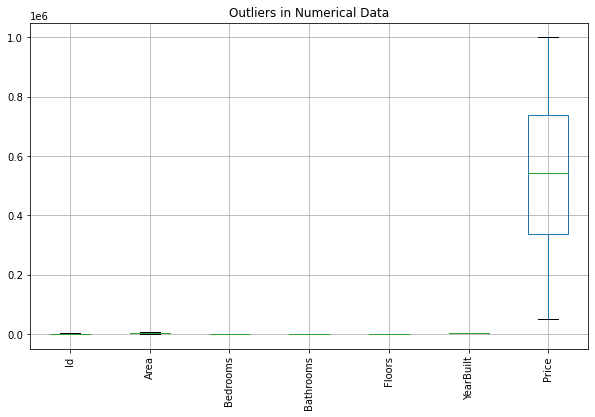

In [12]:
plt.figure(figsize=(10, 6))
Housing[numeric_cols].boxplot(rot=90)
plt.title("Outliers in Numerical Data")
plt.show()

# EDA

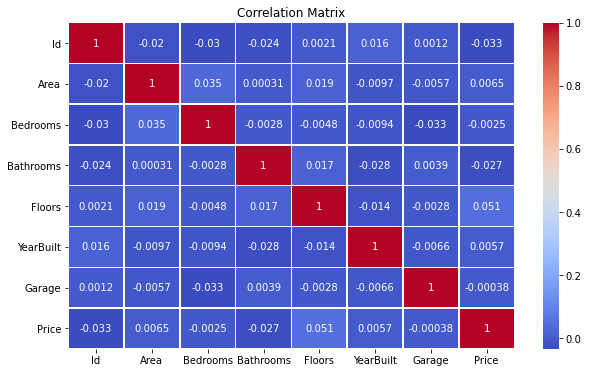

In [13]:
# Select only numeric columns
numeric_cols = Housing.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [14]:
Housing.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,1000.476190,2786.301429,3.012381,2.615238,1.995238,1961.870000,0.478095,540565.905238
std,563.570309,1195.162498,1.325471,1.038816,0.747220,33.405199,0.499639,255046.842453
min,1.000000,501.000000,1.000000,1.000000,1.000000,1900.000000,0.000000,50005.000000
25%,525.750000,1865.000000,2.000000,2.000000,1.000000,1934.000000,0.000000,338263.750000
50%,1000.000000,2779.000000,3.000000,3.000000,2.000000,1962.000000,0.000000,543085.000000
75%,1475.250000,3702.000000,4.000000,3.000000,3.000000,1989.000000,1.000000,736919.250000
max,2000.000000,4999.000000,5.000000,4.000000,3.000000,2023.000000,1.000000,999656.000000


# DATA VISUALIZATION

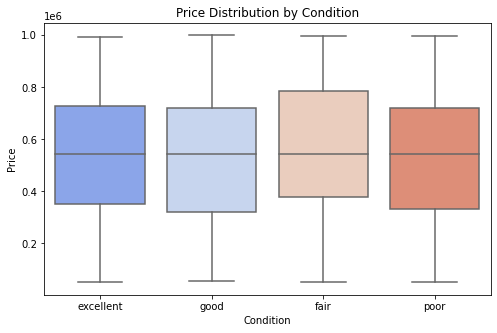

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Housing["Condition"], y=Housing["Price"],palette="coolwarm")
plt.title("Price Distribution by Condition")
plt.show()

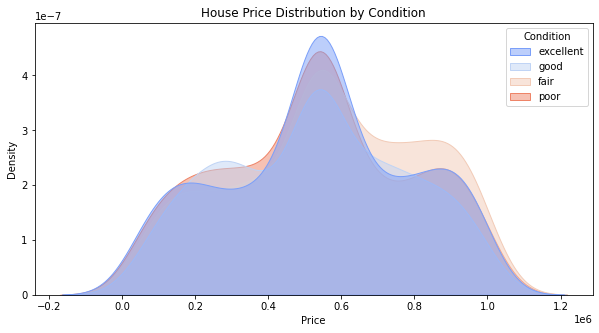

In [16]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=Housing, x="Price", hue="Condition", fill=True, palette="coolwarm", alpha=0.5)
plt.title("House Price Distribution by Condition")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

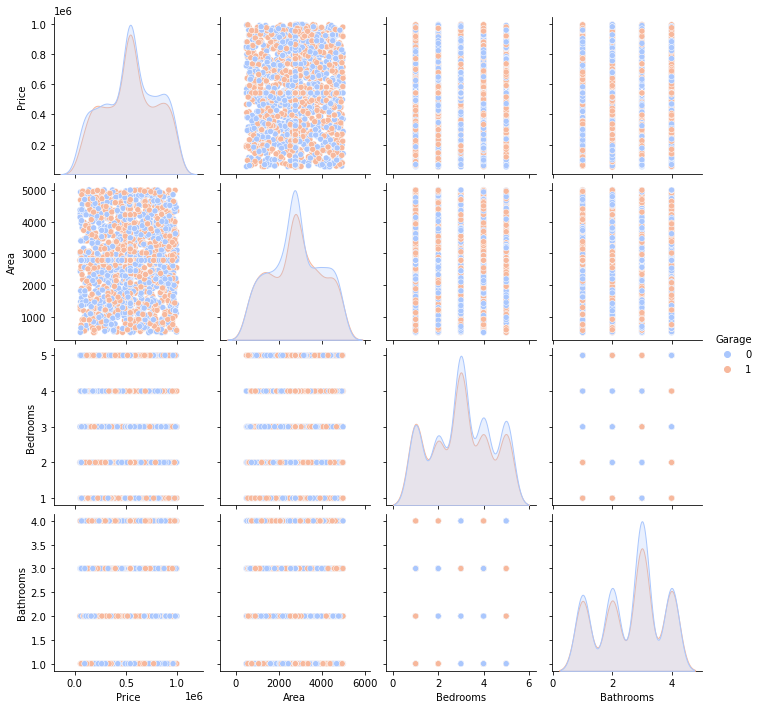

In [17]:
sns.pairplot(Housing, vars=["Price", "Area", "Bedrooms", "Bathrooms"], hue="Garage", palette="coolwarm")
plt.show()

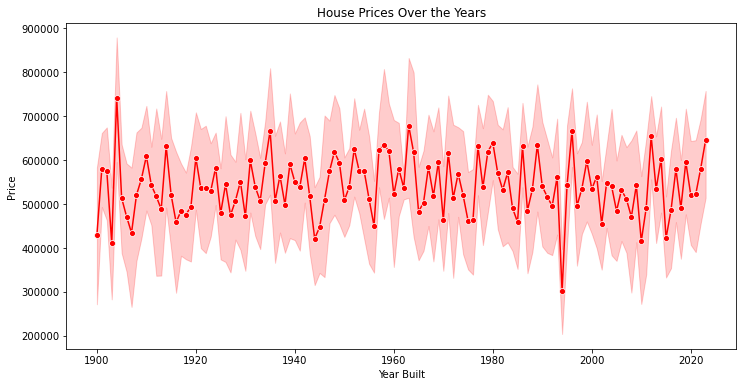

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearBuilt", y="Price", marker="o", data=Housing, color="red")
plt.title("House Prices Over the Years")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

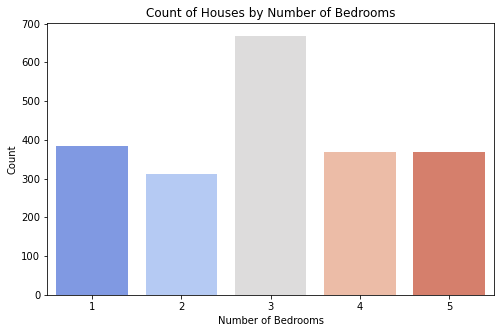

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Bedrooms", data=Housing, palette="coolwarm")
plt.title("Count of Houses by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

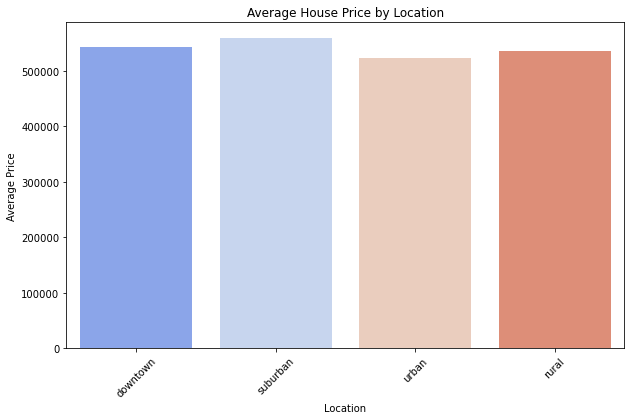

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Location", y="Price", data=Housing, estimator=np.mean, palette="coolwarm", ci=None)
plt.title("Average House Price by Location")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


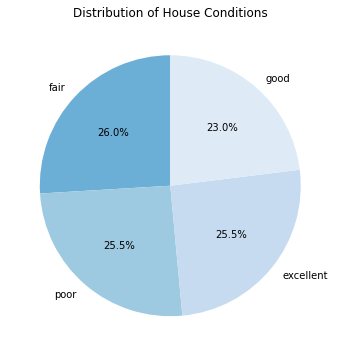

In [21]:
plt.figure(figsize=(8, 6))
Housing["Condition"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#6baed6", "#9ecae1", "#c6dbef", "#deebf7"], startangle=90)
plt.title("Distribution of House Conditions")
plt.ylabel("")
plt.show()

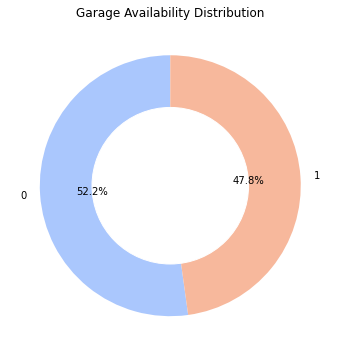

In [22]:
plt.figure(figsize=(8, 6))
garage_counts = Housing['Garage'].value_counts()
plt.pie(garage_counts, labels=garage_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(garage_counts)))
plt.gca().add_artist(plt.Circle((0,0), 0.6, color='white'))
plt.title("Garage Availability Distribution")
plt.show()

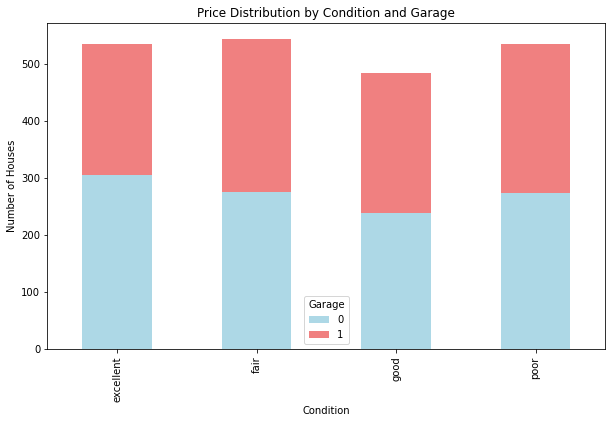

In [23]:
price_condition = Housing.groupby(["Condition", "Garage"]).size().unstack()
price_condition.plot(kind="bar", stacked=True, figsize=(10, 6), color=["lightblue", "lightcoral"])
plt.title("Price Distribution by Condition and Garage")
plt.xlabel("Condition")
plt.ylabel("Number of Houses")
plt.show()


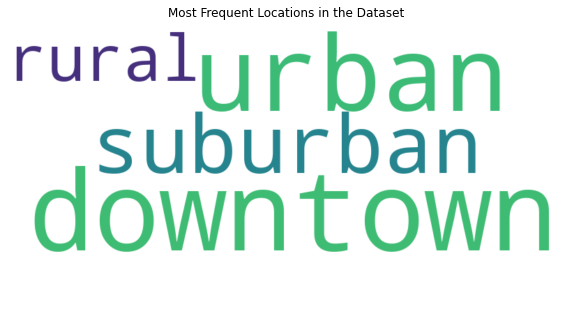

In [24]:
from wordcloud import WordCloud

location_text = " ".join(Housing["Location"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(location_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Locations in the Dataset")
plt.show()

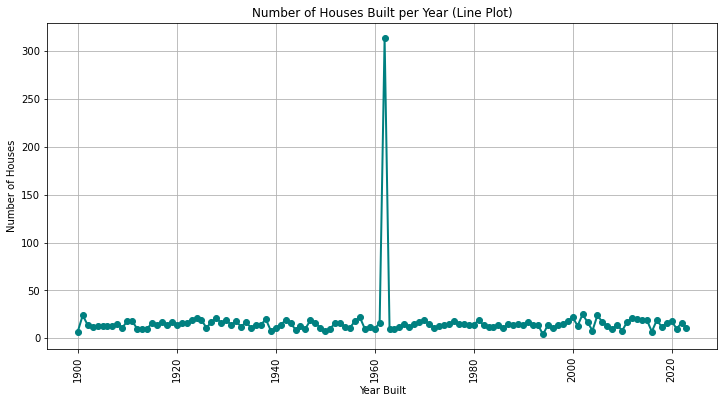

In [25]:
# Count the number of houses per year
houses_per_year = Housing['YearBuilt'].value_counts().sort_index()

# Plotting the data as a line plot
plt.figure(figsize=(12, 6))
houses_per_year.plot(kind='line', marker='o', color='teal', linewidth=2)
plt.title("Number of Houses Built per Year (Line Plot)")
plt.xlabel("Year Built")
plt.ylabel("Number of Houses")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Feature Engineering

In [26]:
# Create new feature: Age of the house
Housing["HouseAge"] = 2025 - Housing["YearBuilt"]

In [27]:
# Create new feature: Area per room
Housing["TotalRooms"] = Housing["Bedrooms"] + Housing["Bathrooms"]
Housing["AreaPerRoom"] = Housing["Area"] / (Housing["TotalRooms"] + 1)  # avoid divide-by-zero

In [28]:
# Create a flag: IsSingleFloor
Housing["IsSingleFloor"] = (Housing["Floors"] == 1).astype(int)
Housing.head(20)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,HouseAge,TotalRooms,AreaPerRoom,IsSingleFloor
0,1,2779,5,3,3,1970,downtown,excellent,0,149919,55,8,308.777778,0
1,2,4272,5,4,3,1958,downtown,excellent,0,424998,67,9,427.200000,0
2,3,3592,2,2,3,1938,downtown,good,0,266746,87,4,718.400000,0
3,4,966,4,2,2,1902,suburban,fair,1,543085,123,6,138.000000,0
4,5,4926,1,4,2,1975,downtown,fair,1,636056,50,5,821.000000,0
5,6,3944,3,2,1,1906,urban,poor,0,93262,119,5,657.333333,1
6,7,3671,1,1,2,1962,rural,poor,1,448722,63,2,1223.666667,0
7,8,3419,2,3,1,1925,suburban,good,1,594893,100,5,569.833333,1
8,9,630,3,2,1,1932,rural,poor,1,652878,93,5,105.000000,1
9,10,2185,3,3,1,2000,downtown,poor,0,340375,25,6,312.142857,1


In [29]:
# Convert categorical columns to numerical
label_encoder = LabelEncoder()
Housing['Location'] = label_encoder.fit_transform(Housing['Location'].astype(str))
Housing['Condition'] = label_encoder.fit_transform(Housing['Condition'].astype(str))

# Drop non-useful columns (you can decide whether to keep 'Id', 'Garage' based on your analysis)
Housing = Housing.drop(columns=['Id'])

# Split data into features (X) and target (y)
X = Housing.drop(columns=['Price'])
y = Housing['Price']
Housing.head(20)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,HouseAge,TotalRooms,AreaPerRoom,IsSingleFloor
0,2779,5,3,3,1970,0,0,0,149919,55,8,308.777778,0
1,4272,5,4,3,1958,0,0,0,424998,67,9,427.200000,0
2,3592,2,2,3,1938,0,2,0,266746,87,4,718.400000,0
3,966,4,2,2,1902,2,1,1,543085,123,6,138.000000,0
4,4926,1,4,2,1975,0,1,1,636056,50,5,821.000000,0
5,3944,3,2,1,1906,3,3,0,93262,119,5,657.333333,1
6,3671,1,1,2,1962,1,3,1,448722,63,2,1223.666667,0
7,3419,2,3,1,1925,2,2,1,594893,100,5,569.833333,1
8,630,3,2,1,1932,1,3,1,652878,93,5,105.000000,1
9,2185,3,3,1,2000,0,3,0,340375,25,6,312.142857,1


In [30]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Corrected print statement
print(f"Linear Regression - RMSE: {rmse_lr:.2f}")

Linear Regression - RMSE: 269834.57


In [32]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - RMSE: {rmse_rf}")

Random Forest - RMSE: 274616.2573039021


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# If you're using filtered data:
# X = Housing_filtered.drop(columns=['Price'])
# y = Housing_filtered['Price']

# OR if you're using your original cleaned Housing dataset:
X = Housing.drop(columns=['Price'])
y = Housing['Price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree - RMSE: {rmse_dt:.2f}")

Decision Tree - RMSE: 359605.09


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Define X and y
X = Housing.drop(columns=['Price'])
y = Housing['Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN Regressor - RMSE: {rmse_knn:.2f}")


KNN Regressor - RMSE: 291792.87


In [35]:
# Prediction
new_data = pd.DataFrame([{
    'Area': 2400,
    'Bedrooms': 3,
    'Bathrooms': 2,
    'Floors': 1,
    'YearBuilt': 2005,
    'Location': 0,   # Ensure lowercase to match training
    'Condition': 0,      # Same here
    'Garage': 1,
    'HouseAge': 2025 - 2005,
    'TotalRooms': 3 + 2,
    'AreaPerRoom': 2400 / (3 + 2 + 1),  # +1 to avoid division by zero
    'IsSingleFloor': 1
}])

# Predict using the trained Random Forest model
predicted_price = rf_model.predict(new_data)

# Display the result
print(f"Predicted House Price: ₹{predicted_price[0]:,.2f}")

Predicted House Price: ₹554,677.04
